If running this notebook in Colab, please ensure that your Hugging Face `HF_TOKEN` is added to your Colab secrets.

Alternatively, please login to Hugging Face by running the following cell.

In [1]:
# !huggingface-cli login

In [2]:
!pip install -q wandb

In [3]:
!wandb login

wandb: Currently logged in as: sadhaklal. Use `wandb login --relogin` to force relogin


In [4]:
import os
import random
import numpy as np
import torch

def seed_everything(seed):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [5]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
type(housing)

sklearn.utils._bunch.Bunch

In [6]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
housing['data']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
housing['data'].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [9]:
housing['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [10]:
housing['target'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

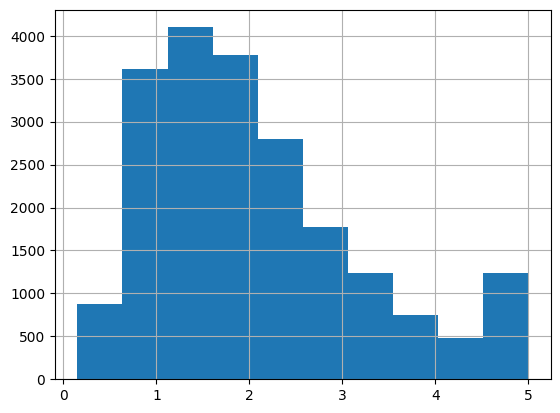

In [11]:
housing['target'].hist();

The distribution is slightly skewed to the right.

In [12]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing['data'], housing['target'], test_size=0.25, random_state=42)
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((11610, 8), (3870, 8), (11610,), (3870,))

In [14]:
X_means, X_stds = X_train.mean(axis=0), X_train.std(axis=0)
X_means.shape, X_stds.shape

((8,), (8,))

In [15]:
X_means

MedInc           3.891759
HouseAge        28.624548
AveRooms         5.455937
AveBedrms        1.099635
Population    1424.281223
AveOccup         2.958867
Latitude        35.646432
Longitude     -119.584363
dtype: float64

In [16]:
X_stds

MedInc           1.909356
HouseAge        12.641462
AveRooms         2.550491
AveBedrms        0.465480
Population    1095.807192
AveOccup         2.361482
Latitude         2.134659
Longitude        2.001019
dtype: float64

In [17]:
X_train = (X_train - X_means) / X_stds
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04,1.161000e+04
mean,3.060046e-17,4.651270e-17,3.549654e-17,-8.170323e-17,1.468822e-17,4.773672e-17,-1.878868e-15,-3.159804e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.776442e+00,-2.185234e+00,-1.790655e+00,-1.646260e+00,-1.297018e+00,-9.598035e-01,-1.450551e+00,-2.381605e+00
25%,-6.896351e-01,-8.404525e-01,-3.886801e-01,-1.992465e-01,-5.815633e-01,-2.250478e-01,-7.993932e-01,-1.112252e+00
50%,-1.745922e-01,2.970006e-02,-8.272357e-02,-1.074281e-01,-2.347869e-01,-6.004621e-02,-6.494863e-01,5.419052e-01
75%,4.615387e-01,6.625383e-01,2.415810e-01,1.333583e-03,2.753393e-01,1.369403e-01,9.713818e-01,7.867804e-01
max,5.817849e+00,1.849110e+00,5.350075e+01,5.271273e+01,1.357969e+01,9.621650e+01,2.952963e+00,2.635838e+00


In [18]:
X_valid = (X_valid - X_means) / X_stds
X_valid.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,-0.028165,-0.009035,-0.031897,-0.023662,0.011740,0.250340,0.000540,0.001253
std,0.988112,0.990529,0.778139,0.744590,1.162605,9.975080,0.998800,1.002969
min,-1.757535,-2.106129,-1.585831,-1.556747,-1.286067,-0.757803,-1.445867,-2.341625
25%,-0.706067,-0.840452,-0.402966,-0.201637,-0.572894,-0.216960,-0.804078,-1.106005
50%,-0.208033,0.029700,-0.100531,-0.108805,-0.232049,-0.058949,-0.640117,0.521915
75%,0.442147,0.662538,0.223178,0.000785,0.278077,0.133395,0.971382,0.786780
max,5.817849,1.849110,18.581632,22.151490,31.262542,525.252521,2.887379,2.555879


In [19]:
X_test = (X_test - X_means) / X_stds
X_test.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000
mean,-0.023053,0.011503,-0.018323,-0.007686,-0.004441,0.001599,-0.027707,0.028362
std,0.988748,0.989461,1.029445,1.216744,1.004324,0.688820,1.003223,1.002691
min,-1.776442,-2.185234,-1.807410,-1.288207,-1.292455,-0.717897,-1.455236,-2.331630
25%,-0.701943,-0.840452,-0.410190,-0.204446,-0.586126,-0.224560,-0.808762,-1.087265
50%,-0.199339,0.029700,-0.092927,-0.112967,-0.240262,-0.058149,-0.668225,0.556898
75%,0.427653,0.662538,0.227899,-0.004724,0.265301,0.139083,0.962013,0.796775
max,5.817849,1.849110,49.824688,70.823708,13.412687,33.967041,2.910802,2.500907


In [20]:
from torch.utils.data import Dataset, DataLoader

class CaliforniaHousingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [21]:
train_set = CaliforniaHousingDataset(X_train, y_train)
len(train_set)

11610

In [22]:
# Sanity check:
x, y = train_set[0]
x.shape, y.shape

(torch.Size([8]), torch.Size([]))

In [23]:
x

tensor([-0.1940, -1.0778, -0.9433,  0.0149,  0.0207, -0.5729,  0.9292, -1.4221])

In [24]:
y

tensor(1.4420)

In [25]:
valid_set = CaliforniaHousingDataset(X_valid, y_valid)
test_set = CaliforniaHousingDataset(X_test, y_test)
len(valid_set), len(test_set)

(3870, 5160)

In [26]:
batch_size = 128
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
len(train_loader)

91

In [27]:
# Sanity check:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([128, 8]), torch.Size([128]))

In [28]:
x_batch.dtype, y_batch.dtype

(torch.float32, torch.float32)

In [29]:
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)
len(valid_loader), len(test_loader)

(31, 41)

In [30]:
device = torch.device("cpu")
device

device(type='cpu')

In [31]:
import torch.nn as nn
from huggingface_hub import PyTorchModelHubMixin

class MLP(nn.Module, PyTorchModelHubMixin):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 50)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        act = torch.relu(self.fc1(x))
        act = torch.relu(self.fc2(act))
        act = torch.relu(self.fc3(act))
        return self.fc4(act)

In [32]:
model = MLP()
model.to(device)

MLP(
  (fc1): Linear(in_features=8, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)

In [33]:
# Sanity check:
with torch.no_grad():
    preds = model(x_batch)
preds.shape

torch.Size([128, 1])

In [34]:
loss_fn = nn.MSELoss(reduction='sum')
loss_fn

MSELoss()

In [35]:
# Sanity check:
with torch.no_grad():
    loss = loss_fn(preds.squeeze(), y_batch)
loss

tensor(667.0707)

In [36]:
from torch.optim import Adam

learning_rate = 1e-3
optimizer = Adam(model.parameters(), lr=learning_rate)
n_epochs = 20

In [37]:
def train_epoch():
    model.train()
    train_loss = 0
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        preds = model(x_batch)
        loss = loss_fn(preds.squeeze(), y_batch)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_set)
    train_loss = round(train_loss, 4)
    return train_loss

In [38]:
import math

def validate_epoch():
    model.eval()
    valid_loss = 0
    for x_batch, y_batch in valid_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        with torch.no_grad():
            preds = model(x_batch)
            loss = loss_fn(preds.squeeze(), y_batch)
        valid_loss += loss.item()
    valid_loss /= len(valid_set)
    rmse = math.sqrt(valid_loss)
    valid_loss = round(valid_loss, 4)
    rmse = round(rmse, 4)
    return valid_loss, rmse

In [39]:
import wandb

wandb_config = {
    'architecture': "MLP",
    'dataset': "California Housing",
    'batch_size': batch_size,
    'learning_rate': learning_rate,
    'n_epochs': n_epochs
}
wandb.init(
    project="mlp-california-housing",
    config=wandb_config,
    notes="Logging min of `train_loss`, `valid_loss` & `rmse`."
)
wandb.define_metric("train_loss", summary="min")
wandb.define_metric("valid_loss", summary="min")
wandb.define_metric("rmse", summary="min")

wandb: Currently logged in as: sadhaklal. Use `wandb login --relogin` to force relogin


In [40]:
best_epoch = 0
best_rmse = float('inf')
for epoch in range(n_epochs):
    train_loss = train_epoch()

    valid_loss, rmse = validate_epoch()

    print(f"Epoch: {epoch}, Training Loss: {train_loss}, Validation Loss: {valid_loss}, RMSE: {rmse}")
    wandb.log({'train_loss': train_loss, 'valid_loss': valid_loss, 'rmse': rmse})

    if rmse < best_rmse:
        best_epoch = epoch
        best_rmse = rmse
        model.push_to_hub("mlp-california-housing", commit_message=f"epoch: {epoch}, rmse: {rmse}")
    print("---")
wandb.finish()
print("---")
print("Done!")
print(f"Best Epoch: {best_epoch}, Best RMSE: {best_rmse}")

Epoch: 0, Training Loss: 1.9538, Validation Loss: 1.4603, RMSE: 1.2084


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 1, Training Loss: 0.4921, Validation Loss: 0.4031, RMSE: 0.6349


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 2, Training Loss: 0.4086, Validation Loss: 0.3967, RMSE: 0.6298


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 3, Training Loss: 0.3726, Validation Loss: 0.4009, RMSE: 0.6332
---
Epoch: 4, Training Loss: 0.3603, Validation Loss: 0.3998, RMSE: 0.6323
---
Epoch: 5, Training Loss: 0.3518, Validation Loss: 0.49, RMSE: 0.7
---
Epoch: 6, Training Loss: 0.3437, Validation Loss: 0.3267, RMSE: 0.5716


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 7, Training Loss: 0.3371, Validation Loss: 0.6851, RMSE: 0.8277
---
Epoch: 8, Training Loss: 0.3344, Validation Loss: 0.3426, RMSE: 0.5853
---
Epoch: 9, Training Loss: 0.3271, Validation Loss: 0.4472, RMSE: 0.6687
---
Epoch: 10, Training Loss: 0.3199, Validation Loss: 0.3019, RMSE: 0.5494


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 11, Training Loss: 0.3141, Validation Loss: 0.3836, RMSE: 0.6194
---
Epoch: 12, Training Loss: 0.309, Validation Loss: 0.2999, RMSE: 0.5476


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 13, Training Loss: 0.3056, Validation Loss: 0.4176, RMSE: 0.6462
---
Epoch: 14, Training Loss: 0.3003, Validation Loss: 0.2898, RMSE: 0.5383


model.safetensors:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

---
Epoch: 15, Training Loss: 0.2945, Validation Loss: 0.2897, RMSE: 0.5383
---
Epoch: 16, Training Loss: 0.2969, Validation Loss: 0.3031, RMSE: 0.5505
---
Epoch: 17, Training Loss: 0.2865, Validation Loss: 0.3148, RMSE: 0.561
---
Epoch: 18, Training Loss: 0.2838, Validation Loss: 0.3312, RMSE: 0.5755
---
Epoch: 19, Training Loss: 0.2829, Validation Loss: 0.4105, RMSE: 0.6407
---


rmse,█▂▂▂▂▃▁▄▁▂▁▂▁▂▁▁▁▁▁▂
train_loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
valid_loss,█▂▂▂▂▂▁▃▁▂▁▂▁▂▁▁▁▁▁▂


---
Done!
Best Epoch: 14, Best RMSE: 0.5383


In [41]:
model = MLP.from_pretrained("sadhaklal/mlp-california-housing")
model.to(device)

MLP(
  (fc1): Linear(in_features=8, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=50, bias=True)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)

In [42]:
test_loss = 0
for x_batch, y_batch in test_loader:
    x_batch, y_batch = x_batch.to(device), y_batch.to(device)
    with torch.no_grad():
        preds = model(x_batch)
        loss = loss_fn(preds.squeeze(), y_batch)
    test_loss += loss.item()
test_loss /= len(test_set)
rmse = math.sqrt(test_loss)
rmse = round(rmse, 4)
print(f"Test Set RMSE: {rmse}")

Test Set RMSE: 0.5502


In [43]:
x_new, y_new = test_set[:3]
x_new, y_new

(tensor([[-1.1578, -0.2867, -0.4955, -0.1662, -0.0295,  0.3890,  0.1937,  0.2870],
         [-0.7125,  0.1088, -0.1633,  0.2016,  0.1284, -0.1182, -0.2372,  0.0621],
         [-0.2156,  1.8491, -0.5798,  0.1853, -0.1043, -0.6769,  1.0089, -1.4271]]),
 tensor([0.4770, 0.4580, 5.0000]))

In [44]:
x_new = x_new.to(device)
with torch.no_grad():
    preds = model(x_new)
preds.squeeze()

tensor([0.4918, 1.7917, 4.5566])